In [399]:
from time import time
import csv
from sklearn.cluster import k_means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble
from math import sqrt


In [400]:
data = pd.read_csv('pb_proprocessed.csv')


In [401]:
data.columns

Index(['Unnamed: 0', 'date', 'PB_price', 'tegang_zonghe_zhishu', 'haiyun_BDI',
       'meiyuan_zhishu', 'psjgzs', 'pugang_zhishu', 'tkszs', 'WTI', 'CRU',
       'fgzs', 'tkszs_l1', 'tkszs_l5', 'tkszs_l10', 'tkszs_l20', 'tkszs_l30',
       'tkszs_l40', 'tkszs_l50', 'tkszs_l60', 'PB_price_f1', 'PB_price_f10',
       'PB_price_f20', 'PB_price_f30', 'PB_price_f40', 'PB_price_f50',
       'PB_price_f60', 'tegang_zonghe_zhishu_f1', 'tegang_zonghe_zhishu_f10',
       'tegang_zonghe_zhishu_f20', 'tegang_zonghe_zhishu_f30',
       'tegang_zonghe_zhishu_f40', 'tegang_zonghe_zhishu_f50',
       'tegang_zonghe_zhishu_f60', 'haiyun_BDI_f1', 'haiyun_BDI_f10',
       'haiyun_BDI_f20', 'haiyun_BDI_f30', 'haiyun_BDI_f40', 'haiyun_BDI_f50',
       'haiyun_BDI_f60', 'meiyuan_zhishu_f1', 'meiyuan_zhishu_f10',
       'meiyuan_zhishu_f20', 'meiyuan_zhishu_f30', 'meiyuan_zhishu_f40',
       'meiyuan_zhishu_f50', 'meiyuan_zhishu_f60', 'psjgzs_f1', 'psjgzs_f10',
       'psjgzs_f20', 'psjgzs_f30', 'psjgzs_f40',

In [402]:
if data.columns[0] == 'Unnamed: 0':
    data = data.drop('Unnamed: 0',axis=1)
data = data.drop('date',axis=1)

In [403]:
a = data.corr()
a.to_csv('corr.csv')

In [404]:
data.columns[0:20]

Index(['PB_price', 'tegang_zonghe_zhishu', 'haiyun_BDI', 'meiyuan_zhishu',
       'psjgzs', 'pugang_zhishu', 'tkszs', 'WTI', 'CRU', 'fgzs', 'tkszs_l1',
       'tkszs_l5', 'tkszs_l10', 'tkszs_l20', 'tkszs_l30', 'tkszs_l40',
       'tkszs_l50', 'tkszs_l60', 'PB_price_f1', 'PB_price_f10'],
      dtype='object')

In [408]:
#,'PB_price_l7'
columns = list(data.columns)
# output = ['tkszs_l10','tkszs_l10','tkszs_l30','tkszs_l40','tkszs_l50','tkszs_l60']
output = ['tkszs_l10','tkszs_l10']
columns_feature=columns.copy()
out_and_drop = ['tkszs_l1','tkszs_l5','tkszs_l10','tkszs_l20','tkszs_l30','tkszs_l40',
                'tkszs_l50','tkszs_l60']
for col in out_and_drop:
    columns_feature.remove(col)
    X = data[columns_feature]
Y = data[output]
Y_array=np.array(Y)
origal_mean=Y_array.mean(axis=0)#0表示列，1表示行
origal_std=Y_array.std(axis=0)
data_scale=preprocessing.scale(np.array(data))
data_scale_df=pd.DataFrame(data_scale,columns=columns)
X_scale=data_scale_df[columns_feature]
Y_scale=data_scale_df[output]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scale,Y_scale,test_size=0.05,random_state=0)

In [406]:
x_train = X_scale[0:900]
y_train = X_scale[0:900]
x_test = Y_scale[900:928]
y_test = Y_scale[900:928]

In [412]:
y_train

,tkszs_l10,tkszs_l10
687,-0.752463,-0.752463
331,0.294310,0.294310
564,-0.955064,-0.955064
366,0.129228,0.129228
372,0.046686,0.046686
700,-0.752463,-0.752463
434,-0.302238,-0.302238
285,0.328077,0.328077
644,-0.587380,-0.587380
785,-1.063869,-1.063869


In [409]:
# x_train, x_test, y_train, y_test = train_test_split(X_scale,Y_scale,test_size=0.05,random_state=0)
def try_different_method(clf):
#     clf.fit(x_train,y_train.values.ravel())
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    return score,result
# def try_different_method(clf):
#     clf.fit(x_train,y_train)
#     score = clf.score(x_test, y_test)
#     result = clf.predict(x_test)
#     result_shuchu = clf.predict(x_shuchu)
#     return score,result,result_shuchu
rf =ensemble.RandomForestRegressor(n_estimators=20)
linear_reg = linear_model.LinearRegression()
score,y_predict=try_different_method(rf)
# score,y_predict,result_shuchu=try_different_method(rf)
y_test_1 = np.array(y_test)
row_num=y_predict.shape[0]
col_num=y_predict.shape[1]
print(row_num,col_num)
y_test_2 =  y_test_1.copy()
flag = 0
for xi in range(row_num):
    for yi in range(col_num):

        y_predict[xi][yi]=y_predict[xi][yi]*origal_std[yi]+origal_mean[yi]
        y_test_1[xi][yi]=y_test_1[xi][yi]*origal_std[yi]+origal_mean[yi]
        y_test_2[xi][yi] = y_test_1[xi][yi]
        # print(y_test[xi][yi])
        y_test_1[xi][yi] = round(y_test_1[xi][yi], 1)

        y_test_1[xi][yi] = y_predict[xi][yi] - y_test_1[xi][yi] 
        y_test_1[xi][yi] = round(y_test_1[xi][yi], 1)

#         cha = y_test_1[xi][yi]/y_predict[xi][yi]
        # print(y_test_1[xi][yi])
        cha = y_test_1[xi][yi]
#         if np.fabs(cha)<0.005:
#             flag = flag + 1
        if cha< 5:
            flag = flag + 1
print('score',flag/94)
# print('score',flag/170)

47 2
score 1.0


In [378]:
flag=0
for xi in range(row_num):
    for yi in range(col_num):

        if y_test_1[xi][yi]< 10 and y_test_1[xi][yi]> -10:
            flag = flag + 1
print('score',flag/524)

score 0.17938931297709923


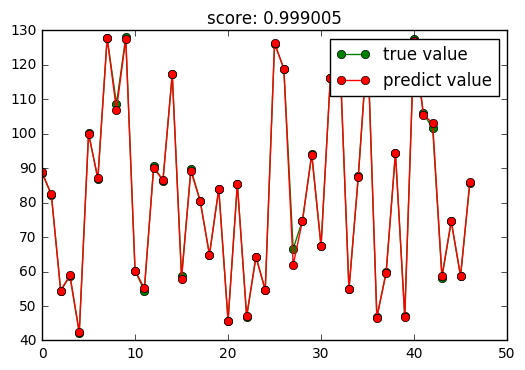

In [379]:
y_predict=y_predict[:,0]
y_test_2=y_test_2[:,0]
plt.figure()
plt.plot(np.arange(len(y_predict)),y_test_2,'go-',label='true value')
plt.plot(np.arange(len(y_predict)),y_predict,'ro-',label='predict value')
plt.title('score: %f'%score)
plt.legend()
plt.show()

In [347]:
shuchu = pd.read_csv('pb_proprocessed_test.csv')
if data.columns[0] == 'Unnamed: 0':
    data = data.drop('Unnamed: 0',axis=1)
shuchu = shuchu.drop(['Unnamed: 0','date'],axis=1)
# data = data.drop('date',axis=1)
a1 = np.array(shuchu)
a2 = np.array(data)
mean=a2.mean(axis=0)#0表示列，1表示行
std=a2.std(axis=0)
# print(a1,origal_mean,origal_std)
row=a1.shape[0]
col=a1.shape[1]
# print(row,col)
for xi in range(row):
    for yi in range(col):

        a1[xi][yi]=(a1[xi][yi]-mean[yi])/std[yi]
        # print(a1[xi][yi])
a3=pd.DataFrame(a1,columns=columns)
x_shuchu = a3[columns_feature]
y_shuchu = a3[output]
y_shuchu = np.array(y_shuchu)

In [348]:
for xi in range(1):
    for yi in range(6):

        # a1[xi][yi]=(a1[xi][yi]-mean[yi])/std[yi]y_shuchu
        result_shuchu[xi][yi]=result_shuchu[xi][yi]*origal_std[yi]+origal_mean[yi]
        y_shuchu[xi][yi]=y_shuchu[xi][yi]*origal_std[yi]+origal_mean[yi]
        print(result_shuchu[xi][yi],y_shuchu[xi][yi])

52.805 56.3
52.685 61.7
52.85 70.0
52.98 67.0
53.935 57.6
54.395 53.3


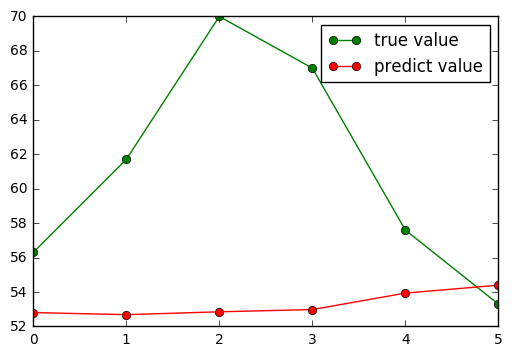

In [349]:

plt.figure()
plt.plot(np.arange(6),y_shuchu[0],'go-',label='true value')
plt.plot(np.arange(6),result_shuchu[0],'ro-',label='predict value')
# plt.title('score: %f'%score)
plt.legend()
plt.show()

In [350]:
result_shuchu[0]

array([ 52.805,  52.685,  52.85 ,  52.98 ,  53.935,  54.395])

In [337]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [338]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [339]:
y_shuchu[0]

array([ 56.3,  61.7,  70. ,  67. ,  57.6,  53.3])